In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                 146KB  2023-10-05 06:45:37          19484        415  1.0              
prasad22/healthcare-dataset                                 Healthcare Dataset                               483KB  2023-10-31 11:30:58            830         26  1.0              
rajatsurana979/fast-food-sales-report                       Restaurant Sales report                          122KB  2023-11-06 20:46:39            962         31  1.0              
nelgiriyewithana/billionaires-statistics-dataset            B

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

 97% 61.0M/62.6M [00:03<00:00, 24.5MB/s]
100% 62.6M/62.6M [00:03<00:00, 17.2MB/s]


In [ ]:
!unzip sign-language-mnist.zip -d sign_language

Archive:  sign-language-mnist.zip
  inflating: sign_language/amer_sign2.png  
  inflating: sign_language/amer_sign3.png  
  inflating: sign_language/american_sign_language.PNG  
  inflating: sign_language/sign_mnist_test.csv  
  inflating: sign_language/sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_language/sign_mnist_train.csv  
  inflating: sign_language/sign_mnist_train/sign_mnist_train.csv  


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [ ]:
for dirname, _, filenames in os.walk('/content/sign_language'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sign_language/amer_sign2.png
/content/sign_language/sign_mnist_test.csv
/content/sign_language/american_sign_language.PNG
/content/sign_language/sign_mnist_train.csv
/content/sign_language/amer_sign3.png
/content/sign_language/sign_mnist_train/sign_mnist_train.csv
/content/sign_language/sign_mnist_test/sign_mnist_test.csv


In [ ]:
train_df = pd.read_csv("/content/sign_language/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/content/sign_language/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
test = pd.read_csv("/content/sign_language/sign_mnist_test/sign_mnist_test.csv")
y = test['label']

<Axes: xlabel='label', ylabel='count'>

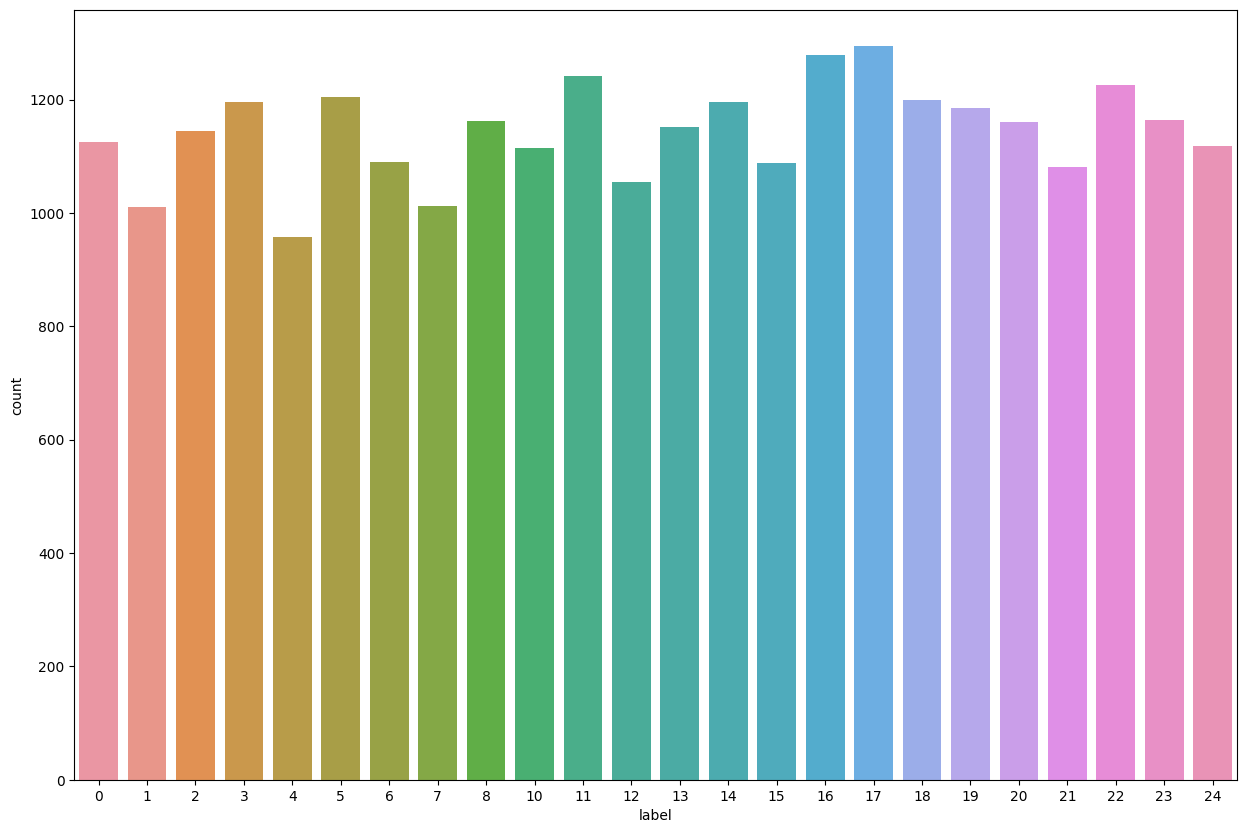

In [ ]:
plt.figure(figsize = (15,10)) # Label Count
sns.countplot(data=train_df, x='label')

Text(0.5, 1.0, 'label: 0  letter: A')

<Figure size 1000x1000 with 0 Axes>

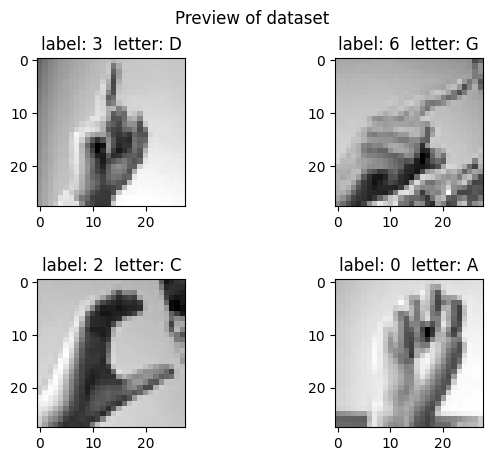

In [ ]:
plt.figure(figsize = (10,10))
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
axe[0,0].imshow(train_df.drop(['label'],axis = 1).values.reshape(-1,28,28,1)[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: D')
axe[0,1].imshow(train_df.drop(['label'],axis = 1).values.reshape(-1,28,28,1)[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: G')
axe[1,0].imshow(train_df.drop(['label'],axis = 1).values.reshape(-1,28,28,1)[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: C')
axe[1,1].imshow(train_df.drop(['label'],axis = 1).values.reshape(-1,28,28,1)[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 0  letter: A')

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
#free memory by deleting the label column
del train_df['label']
del test_df['label']

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

x_train = train_df.values
x_test = test_df.values

In [ ]:
train_df.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
5,161,168,172,173,178,184,189,193,196,202,...,76,74,68,62,53,55,48,238,255,255
6,134,134,135,135,136,137,137,138,138,138,...,109,102,91,65,138,189,179,181,181,179
7,114,42,74,99,104,109,117,127,142,152,...,214,218,220,223,223,225,227,227,228,228
8,169,174,176,180,183,185,187,188,190,191,...,119,118,123,120,118,114,94,74,61,57
9,189,189,189,190,190,191,190,190,190,189,...,13,53,200,204,201,201,193,175,178,156


In [ ]:
# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

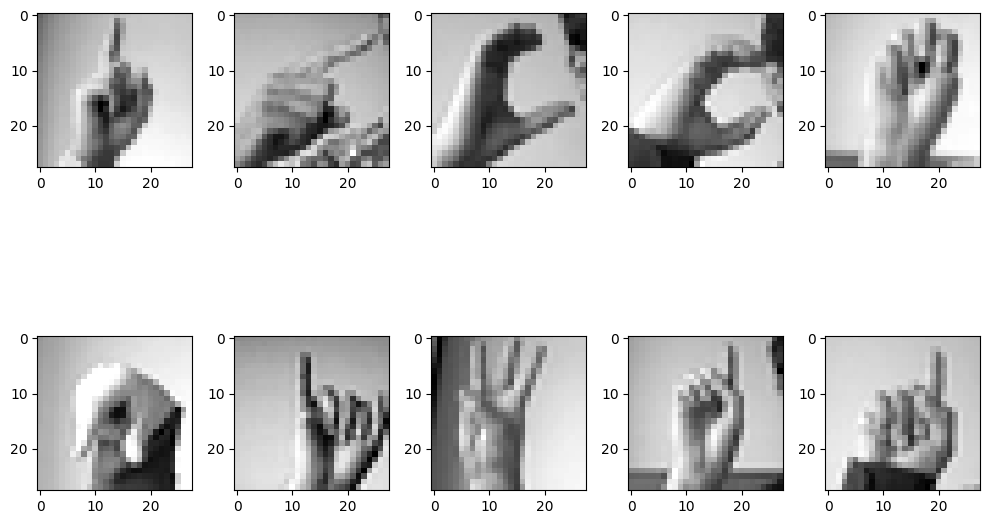

In [ ]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    featurewise_center=False,
    samplewise_center=False
)
datagen.fit(x_train)

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

In [ ]:
model2=Sequential()
model2.add(Conv2D(128,kernel_size=(5,5),strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model2.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model2.add(Conv2D(64,kernel_size=(2,2),strides=1,activation='relu',padding='same'))
model2.add(MaxPool2D((2,2),2,padding='same'))
model2.add(Conv2D(32,kernel_size=(2,2),strides=1,activation='relu',padding='same'))
model2.add(MaxPool2D((2,2),2,padding='same'))
model2.add(Flatten())
model2.add(Dense(units=512,activation='relu'))
model2.add(Dropout(rate=0.25))
model2.add(Dense(units=24,activation='softmax'))
model2.summary()
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 32)         

In [ ]:
history_1 = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 26s 54ms/step - loss: 1.6178 - accuracy: 0.4938 - val_loss: 3.7130 - val_accuracy: 0.1252 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 11s 50ms/step - loss: 0.4650 - accuracy: 0.8441 - val_loss: 2.0996 - val_accuracy: 0.3706 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 10s 48ms/step - loss: 0.2272 - accuracy: 0.9238 - val_loss: 0.1140 - val_accuracy: 0.9649 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 11s 52ms/step - loss: 0.1529 - accuracy: 0.9495 - val_loss: 0.1449 - val_accuracy: 0.9526 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 11s 53ms/step - loss: 0.1153 - accuracy: 0.9611 - val_loss: 0.0367 - val_accuracy: 0.9901 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 14s 65ms/step - loss: 0.0864 - accuracy: 0.9705 - val_loss: 0.8048 - val_accuracy: 0.7695 - lr: 0.0010
Epoch 7/20
214/215 [============================>.] - ETA:

In [ ]:
history_2 = model2.fit(datagen.flow(x_train,y_train,batch_size=128),epochs = 20,validation_data=(x_test,y_test),shuffle=1,callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 14s 55ms/step - loss: 2.7077 - accuracy: 0.1825 - val_loss: 1.4347 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 10s 45ms/step - loss: 1.4258 - accuracy: 0.5337 - val_loss: 0.6506 - val_accuracy: 0.7964 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 11s 49ms/step - loss: 0.9099 - accuracy: 0.6944 - val_loss: 0.3834 - val_accuracy: 0.8816 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 11s 50ms/step - loss: 0.6637 - accuracy: 0.7737 - val_loss: 0.2993 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 10s 48ms/step - loss: 0.5070 - accuracy: 0.8273 - val_loss: 0.1941 - val_accuracy: 0.9342 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 12s 54ms/step - loss: 0.4012 - accuracy: 0.8647 - val_loss: 0.1412 - val_accuracy: 0.9651 - lr: 0.0010
Epoch 7/20
215/215 [==============================] - 11s 

In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 3ms/step - loss: 9.8974e-04 - accuracy: 1.0000
Accuracy of the model is -  100.0 %


In [ ]:
print("Accuracy of the model is - " , model2.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 1s 4ms/step - loss: 0.0134 - accuracy: 0.9958
Accuracy of the model is -  99.58170652389526 %


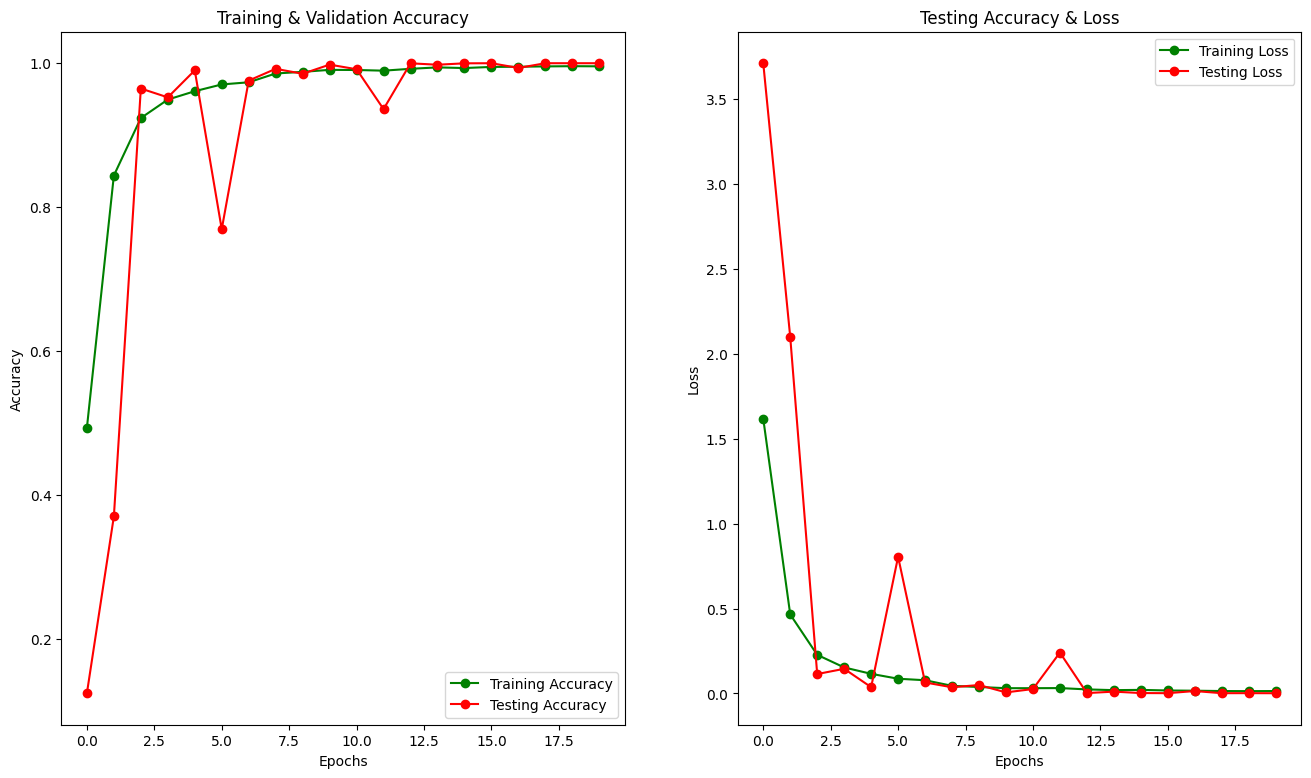

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history_1.history['accuracy']
train_loss = history_1.history['loss']
val_acc = history_1.history['val_accuracy']
val_loss = history_1.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

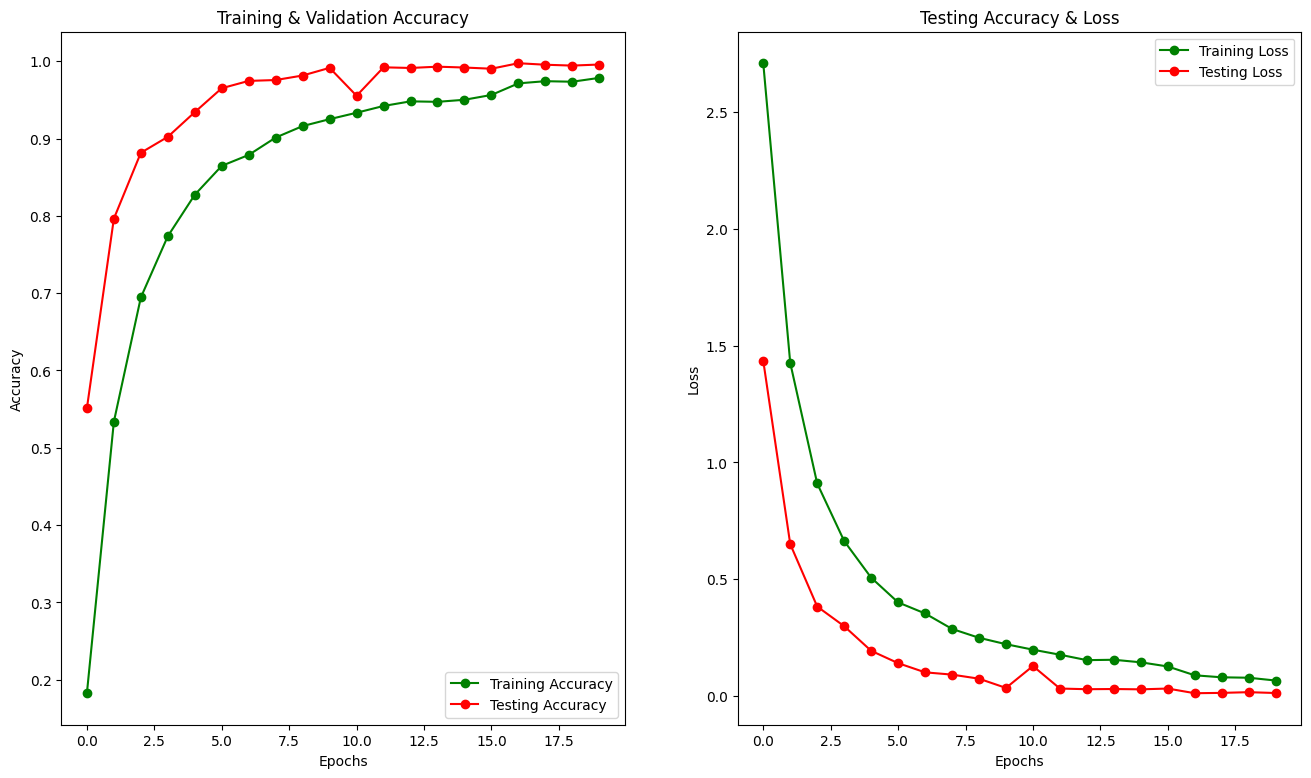

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']
val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions1 = np.argmax(model.predict(x_test), axis=-1)
for i in range(len(predictions1)):
    if(predictions1[i] >= 9):
        predictions1[i] += 1

# Display the first 5 predictions
print(predictions1[:5])

225/225 [==============================] - 1s 3ms/step
[ 6  5 10  0  3]


In [ ]:
predictions2 = np.argmax(model2.predict(x_test), axis=-1)
for i in range(len(predictions2)):
    if(predictions2[i] >= 9):
        predictions2[i] += 1

# Display the first 5 predictions
print(predictions2[:5])

225/225 [==============================] - 1s 2ms/step
[ 6  5 10  0  3]


In [ ]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions1, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [ ]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions2, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      0.93      0.96       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      1.00      1.00       498
     Class 5       1.00      1.00      1.00       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      1.00      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       1.00      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       1.00      1.00      1.00       144
    Class 18       1.00    

In [ ]:
cm1 = confusion_matrix(y,predictions1)
cm2 = confusion_matrix(y,predictions2)

In [ ]:
cm1 = pd.DataFrame(cm1 , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
cm2 = pd.DataFrame(cm2 , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])

<Axes: >

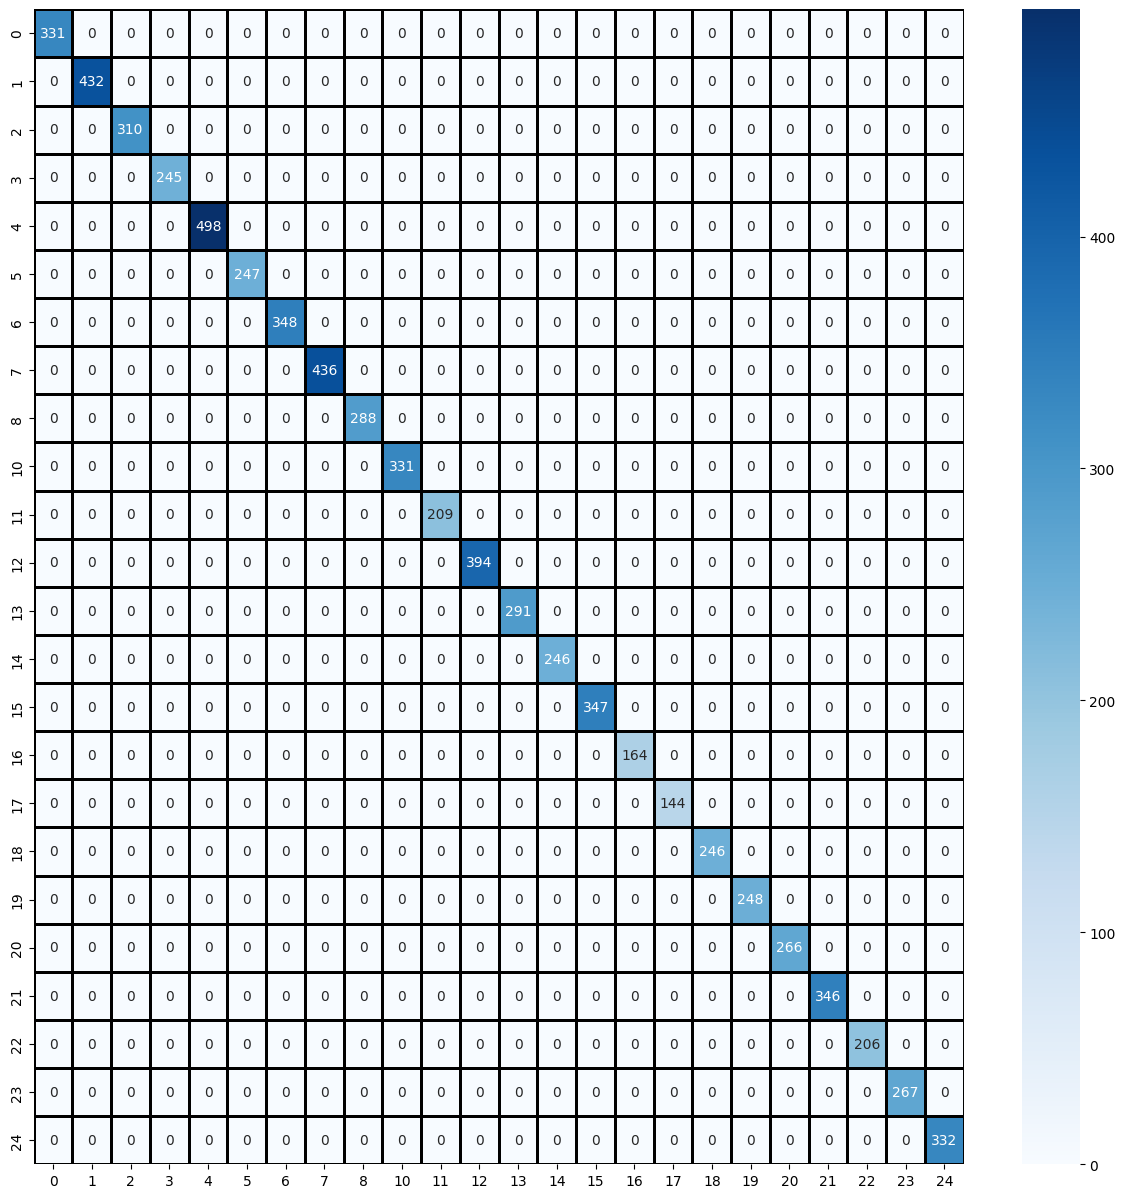

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm1,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

<Axes: >

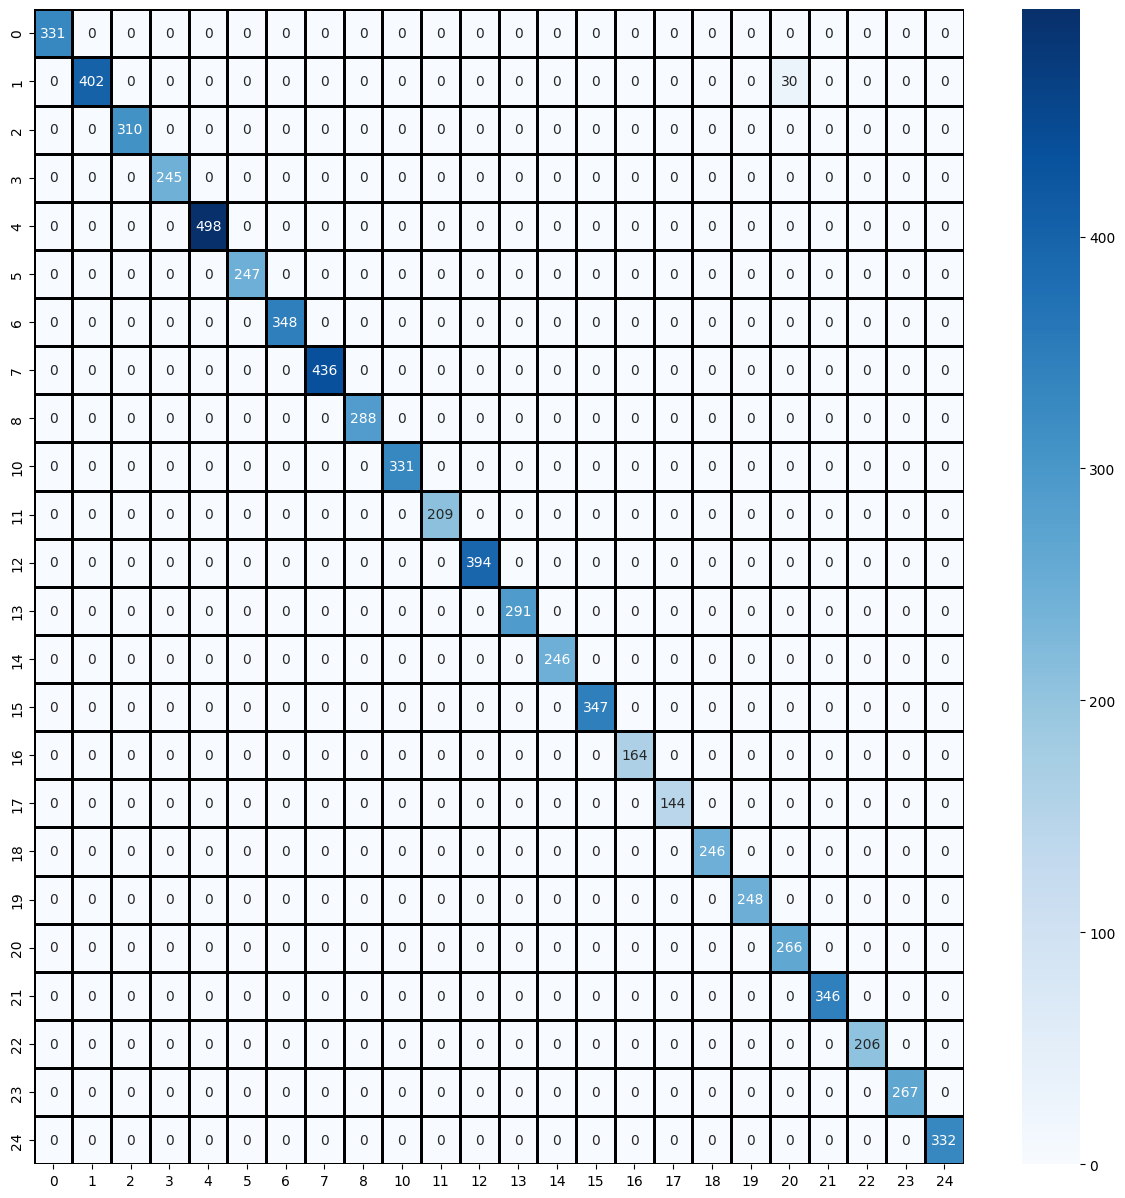

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(cm2,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [ ]:
for i in range(len(predictions1)):
    if predictions1[i] != y[i]:
        print("Index:", i)
        print("Prediction:", predictions1[i])
        print("Actual label:", y[i])

In [ ]:
for i in range(len(predictions2)):
    if predictions2[i] != y[i]:
        print("Index:", i)
        print("Prediction:", predictions2[i])
        print("Actual label:", y[i])

Index: 510
Prediction: 20
Actual label: 1
Index: 793
Prediction: 20
Actual label: 1
Index: 854
Prediction: 20
Actual label: 1
Index: 1200
Prediction: 20
Actual label: 1
Index: 1273
Prediction: 20
Actual label: 1
Index: 1385
Prediction: 20
Actual label: 1
Index: 1473
Prediction: 20
Actual label: 1
Index: 1588
Prediction: 20
Actual label: 1
Index: 1838
Prediction: 20
Actual label: 1
Index: 1930
Prediction: 20
Actual label: 1
Index: 2060
Prediction: 20
Actual label: 1
Index: 2324
Prediction: 20
Actual label: 1
Index: 2559
Prediction: 20
Actual label: 1
Index: 2821
Prediction: 20
Actual label: 1
Index: 2889
Prediction: 20
Actual label: 1
Index: 3310
Prediction: 20
Actual label: 1
Index: 3665
Prediction: 20
Actual label: 1
Index: 4066
Prediction: 20
Actual label: 1
Index: 4110
Prediction: 20
Actual label: 1
Index: 4386
Prediction: 20
Actual label: 1
Index: 4399
Prediction: 20
Actual label: 1
Index: 4794
Prediction: 20
Actual label: 1
Index: 5301
Prediction: 20
Actual label: 1
Index: 5441
Pr

225/225 [==============================] - 1s 4ms/step


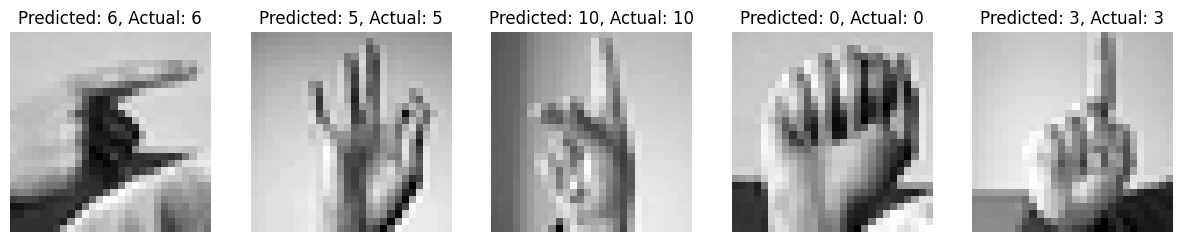

In [ ]:
# Use the model to predict the class labels for the random test images
random_predictions = model.predict(x_test)

# Apply post-processing to get predicted class labels
random_predictions = random_predictions.argmax(axis=1)

# Adjust the labels (e.g., +1) if necessary
for i in range(len(random_predictions)):
    if random_predictions[i] >= 9:
        random_predictions[i] += 1

plt.figure(figsize=(15, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {random_predictions[i]}, Actual: {y[i]}")
    plt.axis('off')
plt.show()